In [1]:
import pandas as pd
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df3 = pd.read_csv('./Input/dataset3_with_missing.csv')

In [3]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9967 entries, 0 to 9966
Data columns (total 19 columns):
id               9967 non-null int64
date             9967 non-null object
price            9967 non-null int64
bedrooms         9967 non-null int64
bathrooms        9567 non-null float64
sqft_living      9901 non-null float64
sqft_lot         9967 non-null int64
floors           9967 non-null float64
waterfront       9967 non-null int64
view             9967 non-null int64
condition        9967 non-null int64
grade            9967 non-null int64
sqft_above       9900 non-null float64
sqft_basement    9900 non-null float64
yr_built         9967 non-null int64
yr_renovated     9967 non-null int64
zipcode          9967 non-null int64
lat              9967 non-null float64
long             9967 non-null float64
dtypes: float64(7), int64(11), object(1)
memory usage: 1.4+ MB


In [4]:
#get the number of missing values for each columns
df3.isnull().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms        400
sqft_living       66
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above        67
sqft_basement     67
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
dtype: int64

In [5]:
df3.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
count,9.967000e+03,9.967000e+03,9967.000000,9567.00000,9901.000000,9.967000e+03,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000,9900.000000,9900.000000,9967.000000,9967.000000,9967.000000,9967.000000,9967.000000
mean,4.582619e+09,5.292077e+05,3.360590,2.08430,2075.559135,1.475640e+04,1.480636,0.006522,0.221932,3.447677,7.667804,1788.707071,286.502626,1970.795124,88.537173,98076.508578,47.562232,-122.207991
std,2.874615e+09,3.292537e+05,0.918844,0.68647,875.594047,3.624471e+04,0.525657,0.080496,0.745250,0.670354,1.157612,803.025500,436.856021,29.212704,411.039302,53.255806,0.137256,0.142927
min,1.000102e+06,7.800000e+04,0.000000,0.00000,290.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.515000
25%,2.124069e+09,3.203000e+05,3.000000,1.75000,1440.000000,5.136500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1200.000000,0.000000,1952.000000,0.000000,98032.000000,47.475700,-122.324000
50%,3.905040e+09,4.500000e+05,3.000000,2.25000,1950.000000,7.725000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1570.000000,0.000000,1975.000000,0.000000,98059.000000,47.574500,-122.221000
75%,7.304301e+09,6.400000e+05,4.000000,2.50000,2550.000000,1.084150e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2240.000000,560.000000,1996.000000,0.000000,98117.000000,47.679200,-122.118000
max,9.895000e+09,7.062500e+06,33.000000,4.50000,10040.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,13.000000,7680.000000,3500.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000


### columns that show explicit clue of missing data:
- sqft_living : 66
- sqft_above : 67
- sqft_basement : 67
- bathrooms : 400


#### We start from the `bathrooms` column which seems irrelevant to the other three.

In [6]:
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,1999700045,20140502T000000,313000,3,1.50,1340.0,7912,1.5,0,0,3,7,1340.0,0.0,1955,0,98133,47.7658,-122.339
1,1860600135,20140502T000000,2384000,5,2.50,3650.0,9050,2.0,0,4,5,10,3370.0,280.0,1921,0,98119,47.6345,-122.367
2,5467900070,20140502T000000,342000,3,2.00,1930.0,11947,1.0,0,0,4,8,1930.0,0.0,1966,0,98042,47.3672,-122.151
3,4040800810,20140502T000000,420000,3,2.25,2000.0,8030,1.0,0,0,4,8,1000.0,1000.0,1963,0,98008,47.6188,-122.114
4,7197300105,20140502T000000,550000,4,2.50,1940.0,10500,1.0,0,0,4,7,1140.0,800.0,1976,0,98052,47.6830,-122.114


In [7]:
df = df3[~df3.bathrooms.isna()]

In [8]:
group_living = df3.groupby('sqft_living')

In [18]:
df['price_transformed'] = np.log(df.price)

/home/zby0902/anaconda3/envs/5196/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


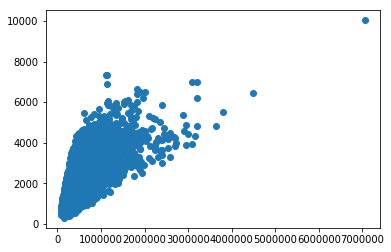

In [22]:
plt.scatter(df.price,y=df.sqft_living)

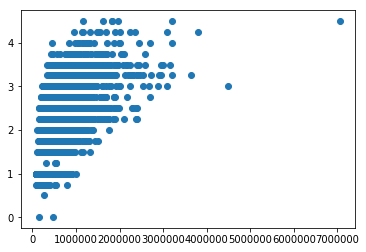

In [20]:
plt.scatter(x=df.price,y=df.bathrooms)

In [14]:
df['living_transformed'] = np.log(df.sqft_living)

/home/zby0902/anaconda3/envs/5196/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


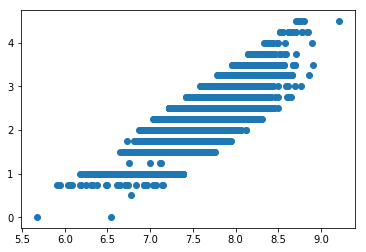

In [15]:
plt.scatter(x=df.living_transformed,y=df.bathrooms);

In [16]:
df['above_transfromed'] =  np.log(df.sqft_above)

/home/zby0902/anaconda3/envs/5196/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


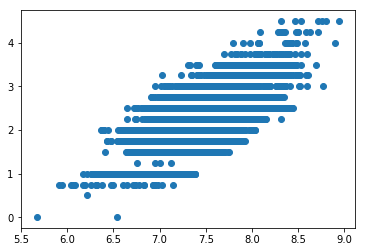

In [17]:
plt.scatter(x=df.above_transfromed,y=df.bathrooms);

**After the investigation, it is discovered that the no of bathrooms only shows a correlation with the sqft_living and sqft_above.**
Since  this two columns contains  missing values as well, it is better we handle the missing values in these columns first.

()

Then we look at the remaining 3 columns `sqft_living`, `sqft_above`, `sqft_base`
From the description of the dataset, we can infer that in usual cases the `sqft_living` should be the sum of `sqft_above` and `sqft_base`.
That is `sqft_living = sqft_aboce + sqft_basement`

In [96]:
three_sqfts = df3[~(df3.sqft_living == df3.sqft_above + df3.sqft_basement)][['sqft_living','sqft_above','sqft_basement']]

In [110]:
three_sqfts.shape,three_sqfts

((200, 3),       sqft_living  sqft_above  sqft_basement
 146        2450.0         NaN            0.0
 189           NaN      1630.0            0.0
 250        1010.0         NaN            0.0
 326        2130.0         NaN         1030.0
 338        1490.0         NaN            0.0
 393         960.0         NaN            0.0
 434        2320.0      1160.0            NaN
 483           NaN      1010.0          720.0
 503        1290.0      1290.0            NaN
 509        1440.0         NaN          480.0
 514         970.0       970.0            NaN
 527        3070.0         NaN         1200.0
 696           NaN      1090.0            0.0
 701           NaN      1470.0          400.0
 905        2240.0         NaN          970.0
 953        1400.0      1140.0            NaN
 956        1300.0      1300.0            NaN
 974        1200.0      1200.0            NaN
 1030          NaN      1900.0            0.0
 1099       2220.0      2220.0            NaN
 1111       2350.0      

This indicate that correlation do exists and it is only the existence of the missing values in one or more columns among the three that produced the above exceptions

To be able to impute the missing values based on our inference, it is necessary that for all records, no more than one column of the three columns should be missing

In [111]:
# check whether the preconditon above is satisfied
np.array(three_sqfts.shape) - np.array(three_sqfts.dropna(thresh=2).shape)

array([0, 0])

The precondition is already satisfied, so we can start impute all the missing values using the equation between the 3 columns.

In [122]:
#impute missing values using the proved equation
df3.sqft_living = df3.sqft_living.fillna(df3.sqft_above + df3.sqft_basement)
df3.sqft_above = df3.sqft_above.fillna(df3.sqft_living - df3.sqft_basement)
df3.sqft_basement = df3.sqft_basement.fillna(df3.sqft_living - df3.sqft_above)

In [119]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9967 entries, 0 to 9966
Data columns (total 19 columns):
id               9967 non-null int64
date             9967 non-null object
price            9967 non-null int64
bedrooms         9967 non-null int64
bathrooms        9567 non-null float64
sqft_living      9967 non-null float64
sqft_lot         9967 non-null int64
floors           9967 non-null float64
waterfront       9967 non-null int64
view             9967 non-null int64
condition        9967 non-null int64
grade            9967 non-null int64
sqft_above       9967 non-null float64
sqft_basement    9967 non-null float64
yr_built         9967 non-null int64
yr_renovated     9967 non-null int64
zipcode          9967 non-null int64
lat              9967 non-null float64
long             9967 non-null float64
dtypes: float64(7), int64(11), object(1)
memory usage: 1.4+ MB


In [121]:
df3.isnull().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms        400
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
dtype: int64

In [128]:
df3.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,1999700045,20140502T000000,313000,3,1.50,1340.0,7912,1.5,0,0,3,7,1340.0,0.0,1955,0,98133,47.7658,-122.339
1,1860600135,20140502T000000,2384000,5,2.50,3650.0,9050,2.0,0,4,5,10,3370.0,280.0,1921,0,98119,47.6345,-122.367
2,5467900070,20140502T000000,342000,3,2.00,1930.0,11947,1.0,0,0,4,8,1930.0,0.0,1966,0,98042,47.3672,-122.151
3,4040800810,20140502T000000,420000,3,2.25,2000.0,8030,1.0,0,0,4,8,1000.0,1000.0,1963,0,98008,47.6188,-122.114
4,7197300105,20140502T000000,550000,4,2.50,1940.0,10500,1.0,0,0,4,7,1140.0,800.0,1976,0,98052,47.6830,-122.114


#### Now its time we get back to the last column that contains missing values which is the `bathrooms`

In [127]:
df3.bathrooms.value_counts()

2.50    2546
1.00    1596
1.75    1441
2.00     921
2.25     913
1.50     633
2.75     555
3.00     315
3.50     279
3.25     239
3.75      49
0.75      31
4.00      21
4.25      14
4.50       7
1.25       4
0.00       2
0.50       1
Name: bathrooms, dtype: int64

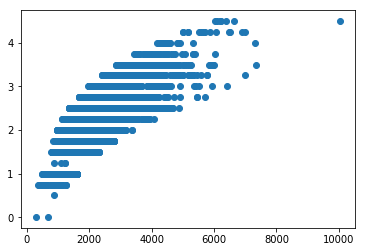

In [124]:
plt.scatter(x=df3.sqft_living, y=df3.bathrooms);

This is not even a mapping since both x and y doesn't have uiniqueness